<a href="https://colab.research.google.com/github/MudassirABBASSi/Computer-Vision/blob/main/Yolo_(object_detection_library).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configure API keys
To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

Go to your Roboflow Settings page. Click Copy. This will place your private key in the clipboard.
In Colab, go to the left pane and click on Secrets (🔑). Store Roboflow API Key under the name ROBOFLOW_API_KEY.

In [1]:
!nvidia-smi

Tue Mar 11 18:00:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# yolo installition

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.9/112.6 GB disk)


#CLI

In [4]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 5.35M/5.35M [00:00<00:00, 158MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 65.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 56.1ms
Speed: 13.2ms preprocess, 56.1ms inference, 329.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


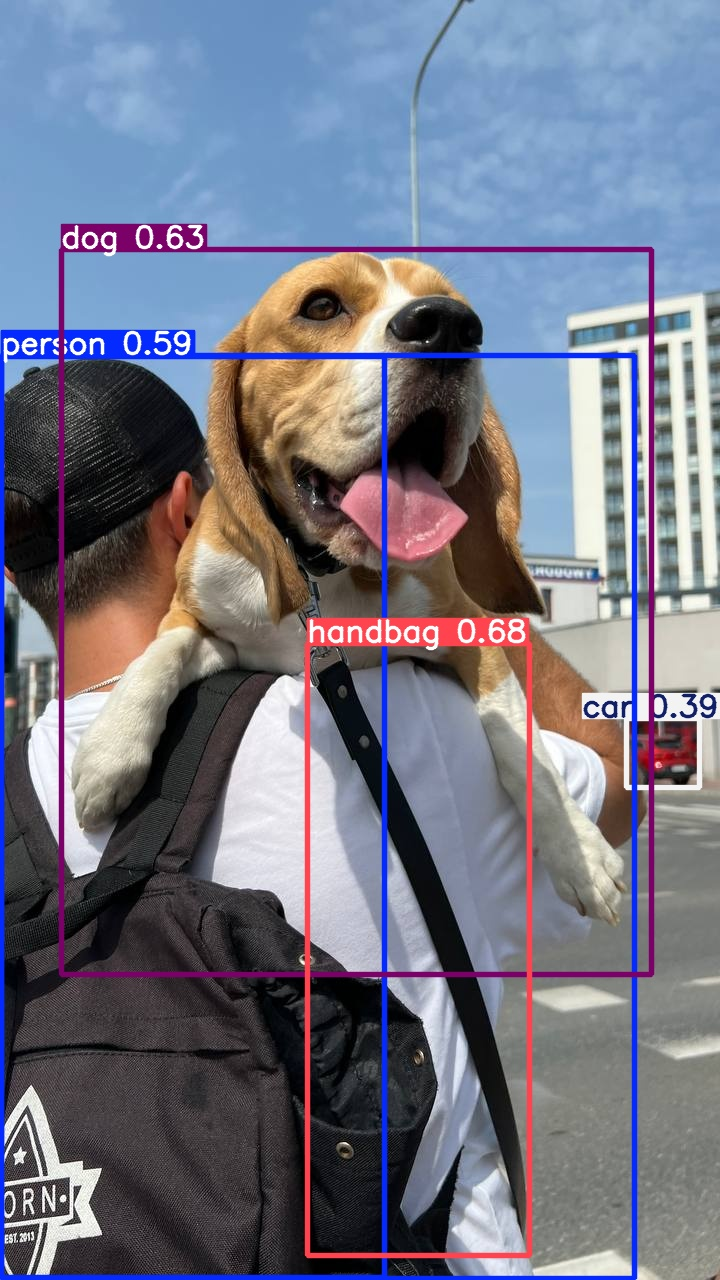

In [5]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpg', width=600)

In [6]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/ws.jpg' save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/ws.jpg: 640x640 1 person, 45.6ms
Speed: 25.5ms preprocess, 45.6ms inference, 591.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


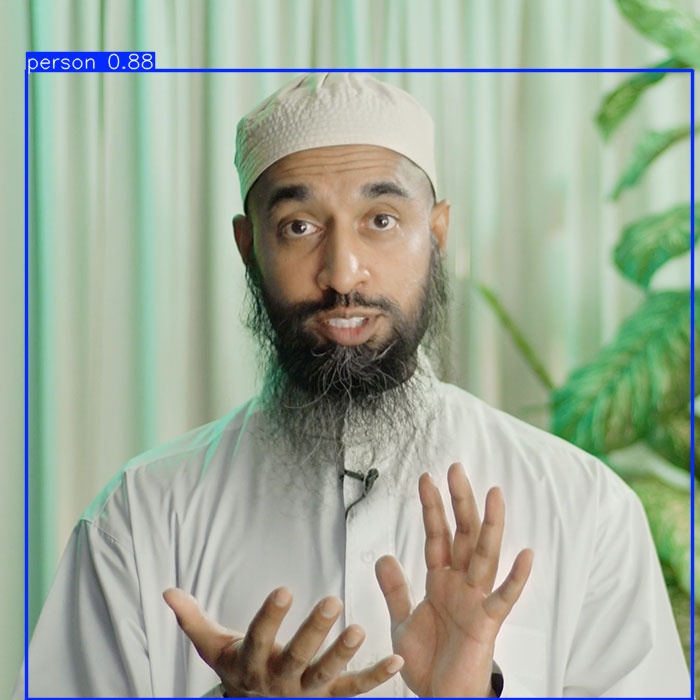

In [7]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/predict2/ws.jpg', width=600)

In [8]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/images.jpeg' save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/images.jpeg: 640x640 1 person, 3 cars, 12.2ms
Speed: 4.7ms preprocess, 12.2ms inference, 167.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


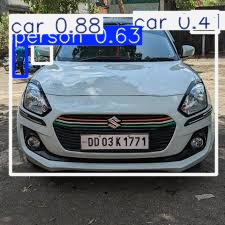

In [9]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/predict3/images.jpg', width=600)

# SDK
NOTE: YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

#url uploaded


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 92.1ms
Speed: 4.4ms preprocess, 92.1ms inference, 203.1ms postprocess per image at shape (1, 3, 640, 384)


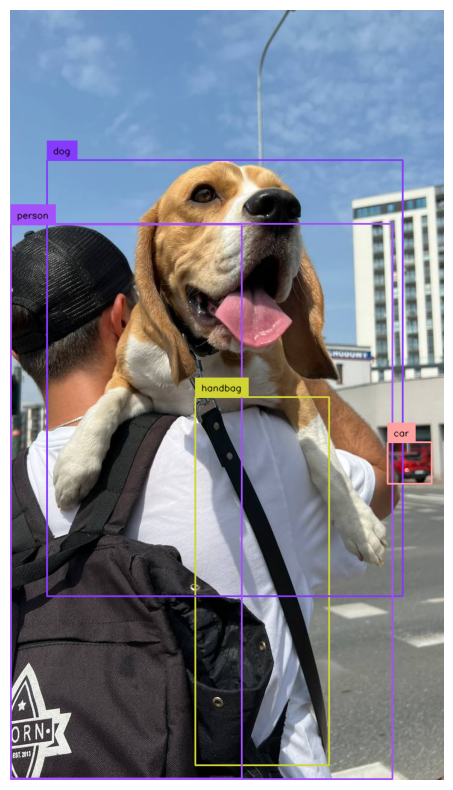

In [10]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]
import supervision as sv

detections = sv.Detections.from_ultralytics(result)


box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

# upload pic

100%|██████████| 38.8M/38.8M [00:00<00:00, 427MB/s]



0: 640x640 1 person, 2 cars, 37.1ms
Speed: 2.6ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


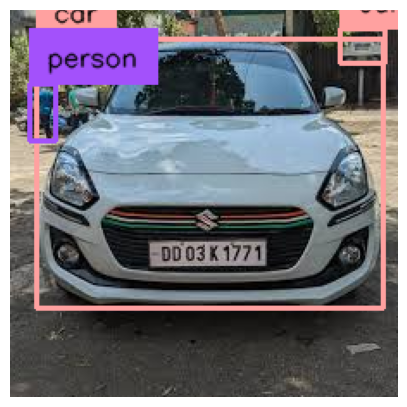

In [11]:
import os
from PIL import Image
import requests
from ultralytics import YOLO
import supervision as sv

# Load the pretrained YOLO model
model = YOLO("yolo11m.pt")  # Ensure the model file exists in your working directory

try:
    # Define the image path (can be a local file path or a full URL)
    image_path = '/content/images.jpeg'  # Replace with a full URL if it's remote, e.g., 'https://example.com/ws.jpg'

    # Check if the image_path is a URL (starts with http:// or https://)
    if image_path.startswith("http://") or image_path.startswith("https://"):
        image = Image.open(requests.get(image_path, stream=True).raw)
    else:
        image = Image.open(image_path)

    # Perform object detection and save results
    results = model.predict(source=image, save=True)
    result = results[0]

    # Convert the model output to a format suitable for annotation
    detections = sv.Detections.from_ultralytics(result)

    # Set up annotators for bounding boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

    # Annotate the image
    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(annotated_image, detections=detections)

    # Display the annotated image
    sv.plot_image(annotated_image, size=(5, 10))

except Exception as e:
    print(f"An error occurred: {e}")


# accapting the image from the user personal computer

In [12]:
import io
from PIL import Image
from ultralytics import YOLO
import supervision as sv
import ipywidgets as widgets
from IPython.display import display

def run_detection(image):
    # Load the pretrained YOLO model (ensure "yolo11m.pt" is in your working directory)
    model = YOLO("yolo11m.pt")

    try:
        # Run object detection on the provided PIL Image
        results = model.predict(source=image, save=True)
        result = results[0]

        # Convert model output to a format suitable for annotation
        detections = sv.Detections.from_ultralytics(result)

        # Annotate the image with bounding boxes and labels
        box_annotator = sv.BoxAnnotator()
        label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
        annotated_image = image.copy()
        annotated_image = box_annotator.annotate(annotated_image, detections=detections)
        annotated_image = label_annotator.annotate(annotated_image, detections=detections)

        # Display the annotated image
        sv.plot_image(annotated_image, size=(5, 10))

    except Exception as e:
        print(f"Error during detection: {e}")

# Create a file upload widget that accepts image files
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

def on_upload_change(change):
    if upload_widget.value:
        # Get the first uploaded file's content as bytes
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        # Convert bytes data to a PIL Image
        image = Image.open(io.BytesIO(content))
        # Run detection on the uploaded image
        run_detection(image)

# Observe changes to the upload widget's value
upload_widget.observe(on_upload_change, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

# fine tunning

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = workspace.project("-qvdww")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 两点钟模型-3 in yolov11:: 100%|██████████| 2612/2612 [00:00<00:00, 5369.42it/s]


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 268MB/s]
New https://pypi.org/project/ultralytics/8.3.88 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/两点钟模型-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

In [15]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1741716228.da0798121a26.1076.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


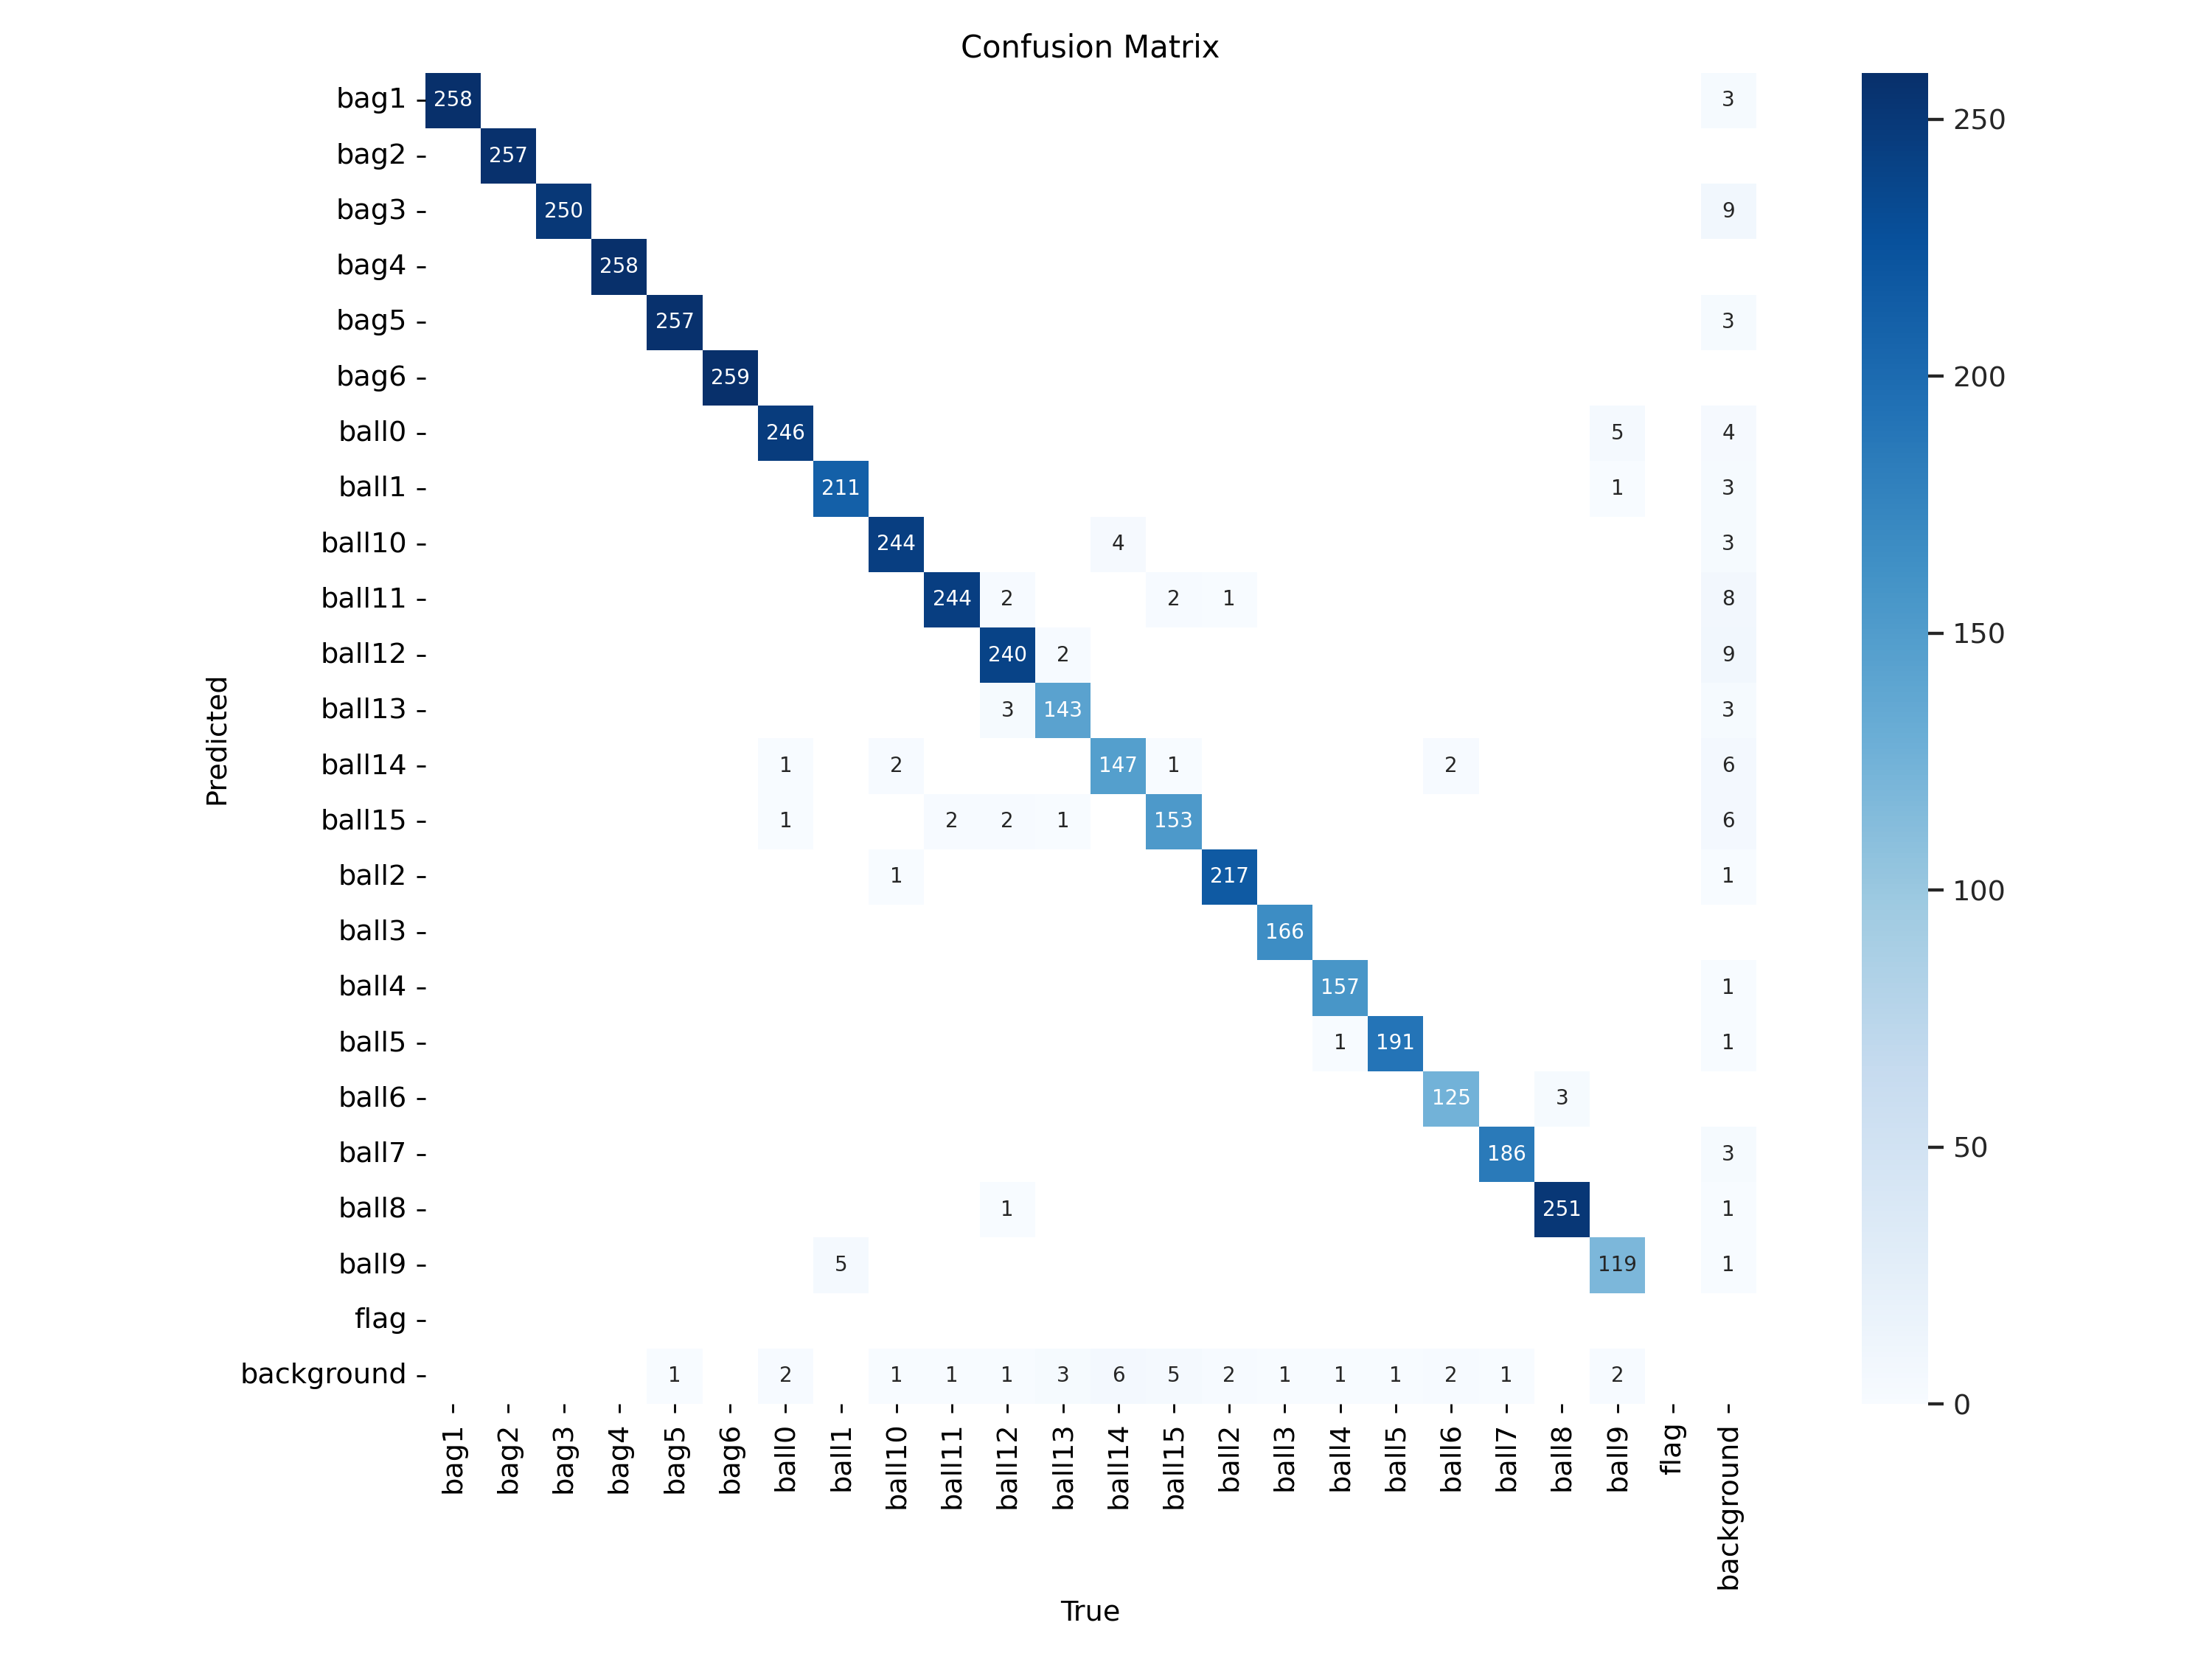

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

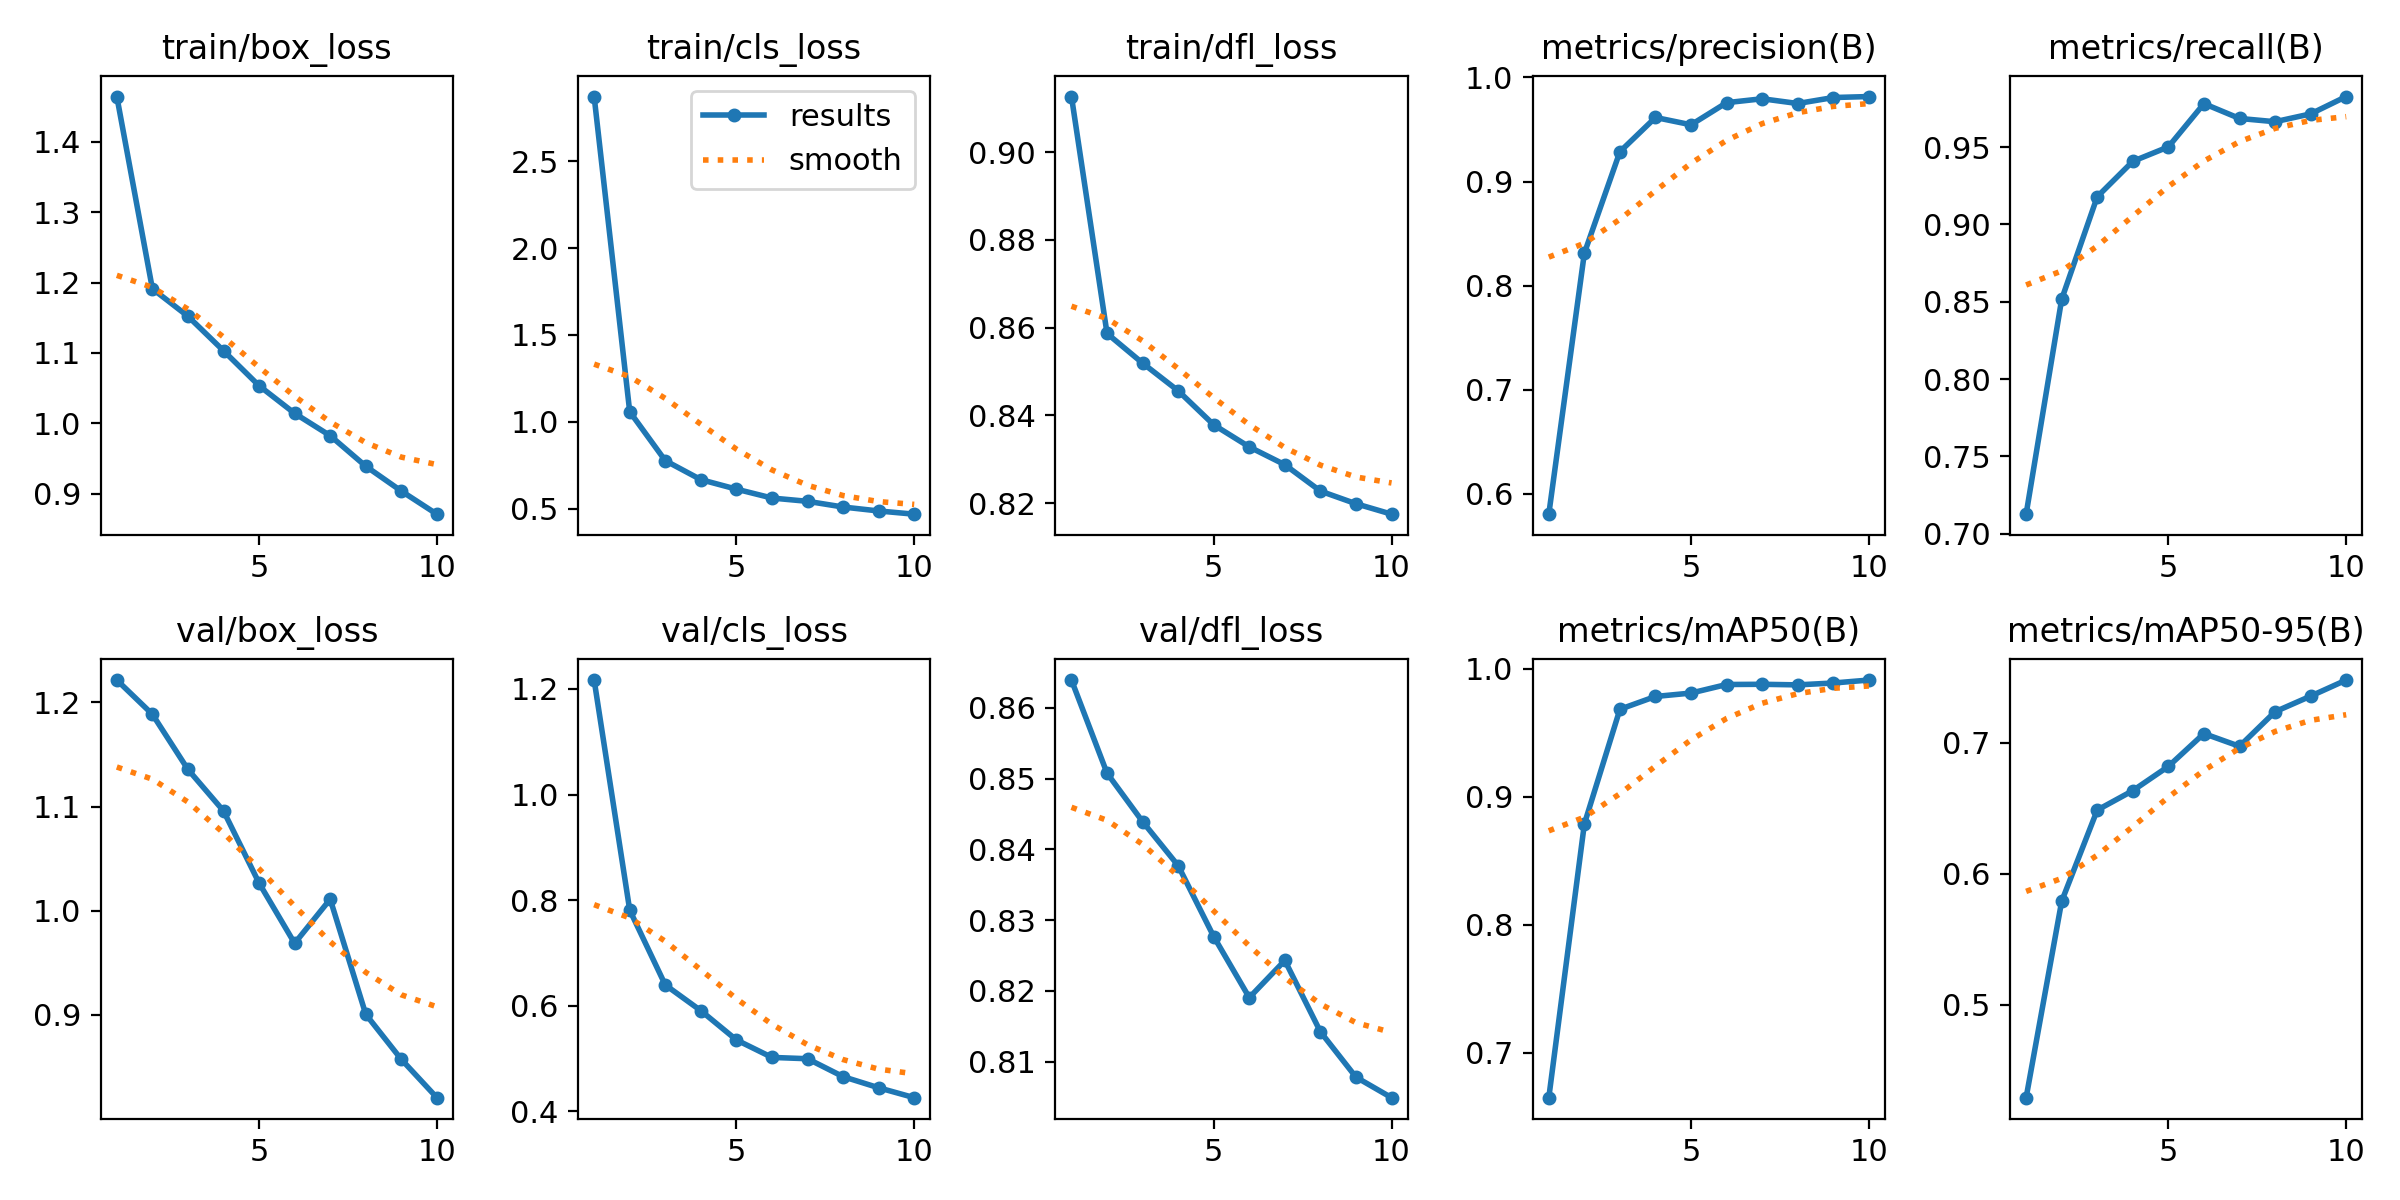

In [17]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

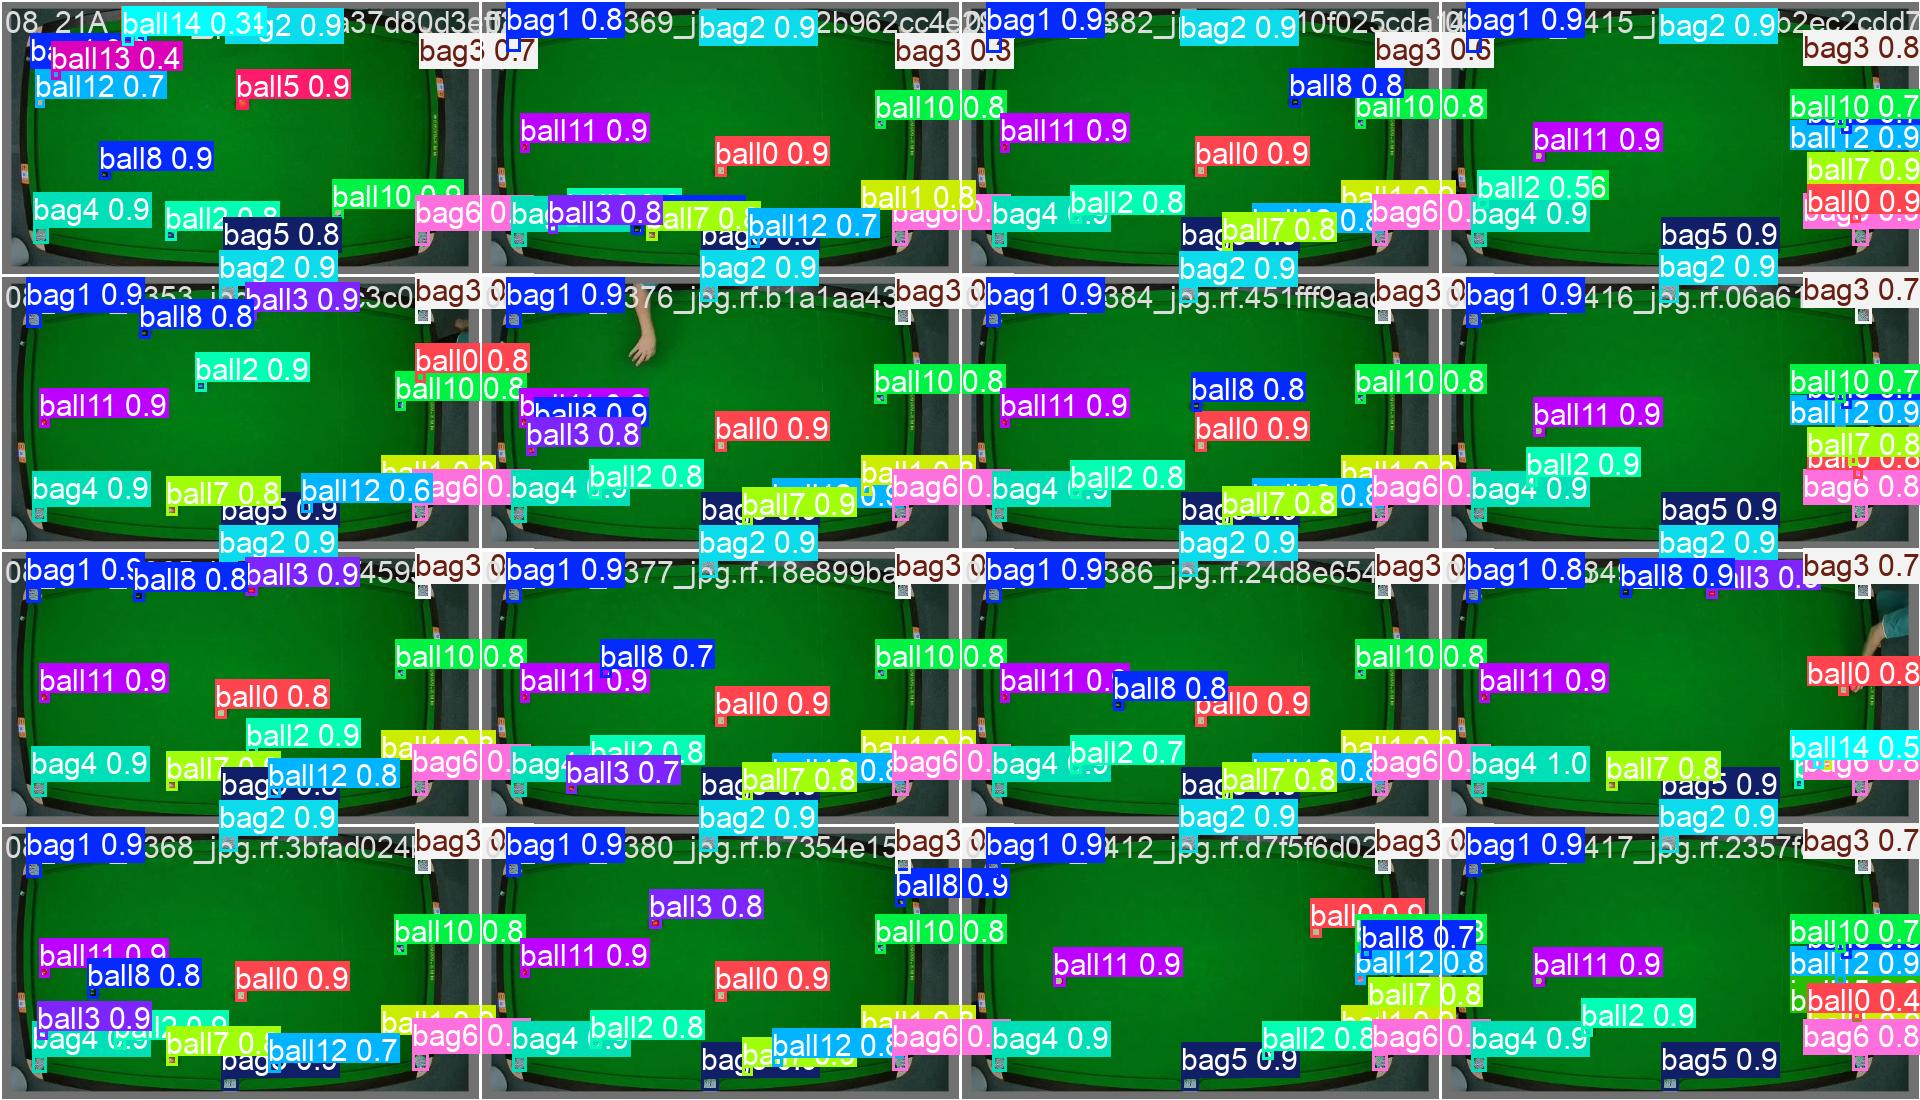

In [18]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [18]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [19]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,421,701 parameters, 0 gradients, 21.3 GFLOPs

image 1/130 /content/datasets/两点钟模型-3/test/images/08_21A_0007_jpg.rf.9e8959e1a1730f1c5c940d000b3d416c.jpg: 384x640 1 bag1, 1 bag2, 1 bag3, 1 bag4, 1 bag5, 1 bag6, 1 ball10, 2 ball12s, 1 ball13, 1 ball2, 1 ball5, 1 ball8, 84.0ms
image 2/130 /content/datasets/两点钟模型-3/test/images/08_21A_0008_jpg.rf.2dd16a0099bef3498fc559918545a9bd.jpg: 384x640 1 bag1, 1 bag2, 1 bag3, 1 bag4, 1 bag5, 1 bag6, 1 ball0, 1 ball10, 1 ball12, 1 ball13, 1 ball2, 1 ball5, 1 ball8, 17.7ms
image 3/130 /content/datasets/两点钟模型-3/test/images/08_21A_0022_jpg.rf.fe9e24fff670ceb0338b20bd49351eda.jpg: 384x640 1 bag1, 1 bag2, 1 bag3, 1 bag4, 1 bag5, 1 bag6, 1 ball0, 1 ball10, 1 ball12, 1 ball2, 1 ball5, 1 ball8, 15.7ms
image 4/130 /content/datasets/两点钟模型-3/test/images/08_21A_0088_jpg.rf.822feee76db82a3f805ca5dfd2a4f19c.jpg: 384x640 1 bag1, 1 bag2, 1 bag3, 1 ba

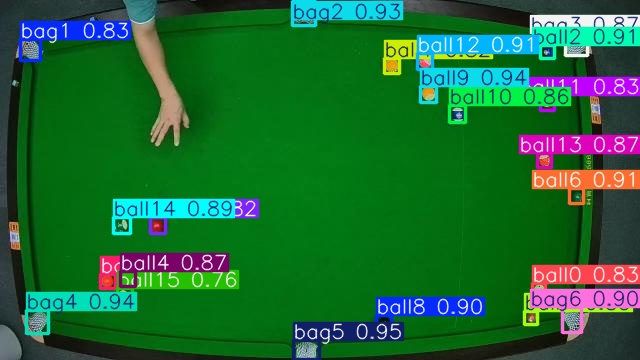

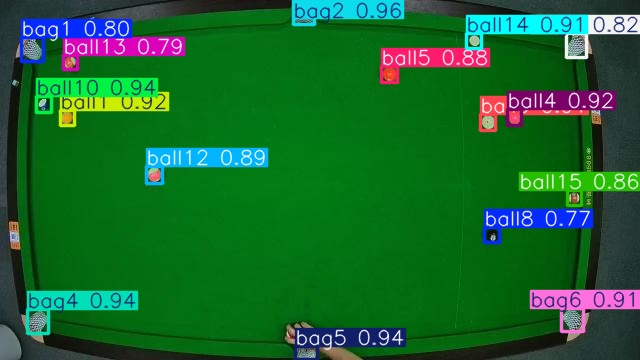

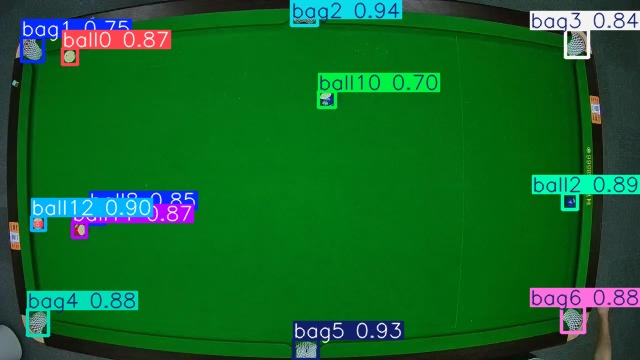

In [20]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")